# **Insert Title Here**
**DATA103 S11 Group 4**
- GOZON, Jean Pauline D.
- JAMIAS, Gillian Nicole A.
- MARCELO Andrea Jean C. 
- REYES, Anton Gabriel G.
- VICENTE, Francheska Josefa

## **Introduction**

### **Requirements and Imports**

#### Imports

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis



In [1]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization
* `spacy` is a Python-based open-source library used in processing text data. 
* `wordcloud` contains functions for generating wordclouds from text data 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS

**Natural Language Processing Libraries**
* `re` is a module that allows the use of regular expressions
* `nltk` provides functions for processing text data
* `stopwords` is a corpus from NLTK, which includes a compiled list of stopwords
* `Counter` is from Python's collections module, which is helpful for tokenization
* `string` contains functions for string operations
* `TFidfVectorizer` converts the given text documents into a matrix, which has TF-IDF features
* `CountVectorizer` converts the given text documents into a matrix, which has the counts of the tokens

In [70]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk import ngrams

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

from collections import Counter
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Mos\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Machine Learning Libraries**

* `torch` this is an open source ML library for deep neural network creation
* `transformers` contains pre-trained models


In [4]:
#!pip install transformers

     ---------------------------------------- 6.8/6.8 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 199.8/199.8 kB 934.0 kB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 1.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import torch
from transformers import BertTokenizer, BertTokenizerFast, BertModel 
from transformers import AutoTokenizer

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


**Google Drive**
* `google.colab` a library that allows the colab notebook to mount the google drive

#### Datasets and Files

The following `.csv` files were used in this project:
* `Suicide_Detection.csv` contains the text itself and the two classes namely suicide and non-suicide. Retrieved from the "Suicide and Depression Detection" in Kaggle
* `twitter-suicidal-intention-dataset.csv` similar to `Suicide_Detection.csv` but intention is numbered. For the intention column, 1 means tweet is suicidal and 0 means it is not. Retrieved from github.
* `500_anonymized_Reddit_users_posts_labels.csv` contains text from a post and the label of intention. (4 labels available)
* `suicide notes.csv` contains text of suicide notes but it does not have a column labelling the notes as suicidal

## **Data Collection**

```
# This is formatted as code
```



In [7]:
#importing the .csv file from kaggle
watch_df = pd.read_csv('data/Suicide_Detection.csv')
watch_df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [8]:
print(watch_df["class"].unique())

['suicide' 'non-suicide']


In [9]:
# importing the twitter dataset
url = "https://raw.githubusercontent.com/laxmimerit/twitter-suicidal-intention-dataset/master/twitter-suicidal_data.csv"
twit_df = pd.read_csv(url)
twit_df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [10]:
print(twit_df["intention"].unique())

[1 0]


In [11]:
anon_df = pd.read_csv("data/500_anonymized_Reddit_posts.csv")
anon_df.head()

,User,Post,Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive
1,user-1,['It can be hard to appreciate the notion that...,Ideation
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,user-3,['I tried to kill my self once and failed badl...,Attempt
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation


In [12]:
print(anon_df["Label"].unique())

['Supportive' 'Ideation' 'Behavior' 'Attempt' 'Indicator']


In [13]:
notes_df = pd.read_csv("data/suicide notes.csv")
notes_df.head()

,id,text
0,1,I have to put this in writing somehow so I sti...
1,2,I've made my peace with the fact that I'm goin...
2,3,I really want help now i just cant so this any...
3,4,I can't think of any reason to stay. I have no...
4,5,NaN


## **Description of the Dataset**

In [14]:
#getting the shape of the four datasets
display(watch_df.shape, twit_df.shape, anon_df.shape, notes_df.shape)

(232074, 3)

(9119, 2)

(500, 3)

(498, 2)

In [15]:
print(watch_df.info(), twit_df.info(), anon_df.info(), notes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9119 non-null   object
 1   intention  9119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    500 non-null    object
 1   Post    500 non-null    object
 2   Label   500 non-null    object
dtypes: object(3)
memory usage: 11.8+

After seeing the number of features in each column per dataset, dataframes `watch_df`, `twit_df`, and `anon_df` are complete. However, dataframe `notes_df` contains null values. 

## **Data Preprocessing**

### **Pre-Processing**

#### DataFrames

Since the dataframe `notes_df` has null values, we will get rid of those rows using panda's dropna() function. Setting the axis to 0 allows us to drop rows which contain missing values. Additionally, the how parameter set to any causes that row to be removed if there is at least 1 null value present in that row. Having inplace equal to true modifies the exisiting Dataframe.

In [16]:
notes_df.dropna(axis = 0, how = "any", inplace=True)

After checking the total number of null values  in the whole `notes_df` we can see it is equal to zero.

In [17]:
notes_df.isnull().sum().sum()

0

For some of the dataframes, the `user`, `id`, and `unnamed column` would not be needed and therefore would be dropped.

In [18]:
anon_df = anon_df.drop("User", axis = 1)
notes_df = notes_df.drop("id", axis = 1)
watch_df = watch_df.drop("Unnamed: 0", axis = 1)

In [19]:
display("anon_df",anon_df.columns, "notes_df", notes_df.columns, "watch_df", watch_df.columns)

'anon_df'

Index(['Post', 'Label'], dtype='object')

'notes_df'

Index(['text'], dtype='object')

'watch_df'

Index(['text', 'class'], dtype='object')

In [20]:
display("anon_df",anon_df.head(), 
        "notes_df", notes_df.head(), 
        "twit_df", twit_df.head(), 
        "watch_df", watch_df.head())

'anon_df'

,Post,Label
0,"['Its not a viable option, and youll be leavin...",Supportive
1,['It can be hard to appreciate the notion that...,Ideation
2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,['I tried to kill my self once and failed badl...,Attempt
4,['Hi NEM3030. What sorts of things do you enjo...,Ideation


'notes_df'

,text
0,I have to put this in writing somehow so I sti...
1,I've made my peace with the fact that I'm goin...
2,I really want help now i just cant so this any...
3,I can't think of any reason to stay. I have no...
5,"Hi, it's my first post here, I'm new in this c..."


'twit_df'

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


'watch_df'

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


After dropping the unecessary columns, it was then time to convert the values for the labeling columns so that once the dataframes are joined, there wouldn't be any further complications. 

Reviewing the columns of all the datasets we imported

In [21]:
display("anon_df columns", list(anon_df.columns),"notes_df columns", list(notes_df.columns),
        "twit_df columns", list(twit_df.columns), "watch_df columns", list(watch_df.columns))

'anon_df columns'

['Post', 'Label']

'notes_df columns'

['text']

'twit_df columns'

['tweet', 'intention']

'watch_df columns'

['text', 'class']

Creating a copy of watch_df before modifying the values to match twit_df (1 means text is suicidal and 0 means it is not)

In [22]:
integerwatch_df = watch_df.copy(deep=True)

Using pandas replace() function to change multiple values with multiple new values for an individual DataFrame column

In [23]:
integerwatch_df['class'] = integerwatch_df['class'].replace(['suicide', 'non-suicide'], ['1', '0'])

In [24]:
 integerwatch_df.head() #checking if the replace function reflected

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1


Using .info() to check the datatypes of the dataframe intgerwatch_df

In [25]:
 integerwatch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


Using panads astype() function allows us to convert the obj data type in the class column to integer for uniformity with other dataframes

In [26]:
integerwatch_df['class'] = integerwatch_df['class'].astype('int')

Creating a copy of notes_df before modifying the values to match twit_df (1 means text is suicidal and 0 means it is not)

In [27]:
 integerwatch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 2.7+ MB


In [28]:
integernotes_df = notes_df.copy(deep=True)

Creating a new column named class and setting it to have a constant value of 1 since all texts are posted by users with  suicidal thoughts

In [29]:
integernotes_df['class'] = 1

In [30]:
integernotes_df.head() #checking if the new class column was addded

,text,class
0,I have to put this in writing somehow so I sti...,1
1,I've made my peace with the fact that I'm goin...,1
2,I really want help now i just cant so this any...,1
3,I can't think of any reason to stay. I have no...,1
5,"Hi, it's my first post here, I'm new in this c...",1


Creating a copy of twit_df before modifying the column names to match integerwatch_df and integernotes_df

In [31]:
new_twit = twit_df.copy(deep=True)

Renaming using pandas rename() function using a dictionary of new and old column names. Inplace set to true modified the existing Dataframe

In [32]:
new_twit.rename(columns={"tweet": "text", "intention": "class"}, inplace=True)

In [33]:
new_twit.head() #checking if column names are renamed

,text,class
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


For `anon_df`, there are five unique values with their respective counts:

In [34]:
anon_df.Label.value_counts()

Ideation      171
Supportive    108
Indicator      99
Behavior       77
Attempt        45
Name: Label, dtype: int64

Columns for `anon_df` were renamed for consistency with the other dataframes.

In [35]:
anon_df.rename(columns={"Post": "text", "Label": "class"}, inplace=True)

Copying `anon_df` before modifying other values.

In [36]:
intanon_df = anon_df.copy(deep =  True)

Using pandas `replace()` function to change multiple values with multiple new values for an individual DataFrame column. For `intanon_df` the 5 values were replaced with a corrosponding `1` or `0` value.

In [37]:
intanon_df['class'] = intanon_df['class'].replace(['Ideation', 'Indicator','Behavior','Attempt','Supportive'], ['1','1','1','1','0'])

Using the `.astype()` function to convert the `class` value's types into `int` or an `integer` type. 

In [38]:
intanon_df['class'] = intanon_df['class'].astype('int')

Looking at the tail of `intanon_df` to check if the `class` values were replaced and converted accordingly. 

In [39]:
intanon_df.tail()

,text,class
495,"['Its not the end, it just feels that way. Or ...",0
496,"['It was a skype call, but she ended it and Ve...",1
497,['That sounds really weird.Maybe you were Dist...,0
498,['Dont know there as dumb as it sounds I feel ...,1
499,"['&gt;It gets better, trust me.Ive spent long ...",1


After changing column names for `anon_df` the following values were changed:

* Ideation = 1
* Indicatior = 1
* Behavior = 1
* Attempt = 1
* Supportive = 0

#### All dataframes

Displaying the dataframes we have now

In [66]:
display("intanon_df",intanon_df.head(), 
        "integernotes_df", integernotes_df.head(), 
        "new_twit", new_twit.head(), 
        "integerwatch_df", integerwatch_df.head())

'intanon_df'

,class,text
0,0,"['Its not a viable option, and youll be leavin..."
1,1,['It can be hard to appreciate the notion that...
2,1,"['Hi, so last night i was sitting on the ledge..."
3,1,['I tried to kill my self once and failed badl...
4,1,['Hi NEM3030. What sorts of things do you enjo...


'integernotes_df'

,class,text
0,1,I have to put this in writing somehow so I sti...
1,1,I've made my peace with the fact that I'm goin...
2,1,I really want help now i just cant so this any...
3,1,I can't think of any reason to stay. I have no...
5,1,"Hi, it's my first post here, I'm new in this c..."


'new_twit'

,class,text
0,1,my life is meaningless i just want to end my l...
1,1,muttering i wanna die to myself daily for a fe...
2,1,work slave i really feel like my only purpose ...
3,1,i did something on the 2 of october i overdose...
4,1,i feel like no one cares i just want to die ma...


'integerwatch_df'

,class,text
0,1,Ex Wife Threatening SuicideRecently I left my ...
1,0,Am I weird I don't get affected by compliments...
2,0,Finally 2020 is almost over... So I can never ...
3,1,i need helpjust help me im crying so hard
4,1,"I’m so lostHello, my name is Adam (16) and I’v..."


We switch the placement of the `text` and `class` columns in all four dataframes.

In [67]:
new_column_order = ['class', 'text'] #making the new column order

intanon_df = intanon_df[new_column_order]
integernotes_df = integernotes_df[new_column_order]
new_twit = new_twit[new_column_order]
integerwatch_df = integerwatch_df[new_column_order]

Using the `concat` function, we merge all the dataframes into one dataframe.

In [65]:
main_df = pd.concat([intanon_df, integernotes_df, new_twit, integerwatch_df], axis=0)

We now check if the merged dataframe for its shape.

In [68]:
display(main_df.shape , concat["class"].unique())

(242160, 2)

array([0, 1], dtype=int64)

### **Data Cleaning**

#### Removing unnecessary character sequences

We created a RegEx function to remove unnecessary character sequences that might potentially interfere with the next steps before modeling.

In [45]:
def remove_unnecessary(text):
    text = re.sub('RT', '', text) #RT
    text = re.sub('@[^\s]+', '', text) #usernames
    text = re.sub('http[^\s]+','',text) #media links
    text = re.sub(r'\[|\]', '', text) #square brackets
    text = re.sub('#[^ ]+', '', text) #hashtags
    return text

But before applying the function, a copy of the `concat` dataframe was created.

In [46]:
master = concat.copy(deep = True)

Here, the function was applied to the `master` dataframe.

In [47]:
master['text'] = master['text'].apply(remove_unnecessary)

Checking if the `remove_unnecessary` function was applied.

In [48]:
master.head()

,text,class
0,"'Its not a viable option, and youll be leaving...",0
1,'It can be hard to appreciate the notion that ...,1
2,"'Hi, so last night i was sitting on the ledge ...",1
3,'I tried to kill my self once and failed badly...,1
4,'Hi NEM3030. What sorts of things do you enjoy...,1


Checking the shape of the `master` dataframe.

In [49]:
master.shape

(242160, 2)

#### Functions for Feature Engineering

**Batch Processing Function**

Because the `master` dataframe is big, the four dataframes will be processed and cleaned by batch with a function.

In [50]:
def batch_processing_bert(df):
    
    def tokenize_and_remove_stopwords(sentence):
        tokens = tokenizer.tokenize(sentence)
        return tokens

    df['token'] = df['text'].apply(tokenize_and_remove_stopwords)
    df['string'] = df['token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

    return df

**Removing UNK Function**

In [51]:
unk_pattern = re.compile(r'\bUNK\b')

In [52]:
def remove_UNK(text):
    return re.sub(r"\bUNK\b", "", text)

### **Feature Engineering**

Before we start, let us determine what device (i.e., CUDA or CPU) we will be using. If CUDA is available, it will be chosen; otherwise, by default, CPU will be chosen.

In [53]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

NameError: name 'torch' is not defined

#### **Train Test Split**

Because we have one dataframe, we need to divide the dataframe into two: a `train` and a `test` dataframe in order to train the machine learning model.

In [71]:
train, test = train_test_split(main_df, random_state = 42, shuffle = True)

In order to make the text data useful to the model, we extract the `text` column.

In [72]:
x_train = train ['text']
x_test = test ['text']

We check the shape for the `train` and `test` datasets.

In [73]:
x_train.shape

(181620,)

In [74]:
x_test.shape

(60540,)

#### **Tokenizing with Bert**

We get the tokenizer for BERT

In [ ]:
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_wordpiece=True)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Making copies of all the four dataframes for easier access without affecting the original dataframes

In [ ]:
bert_df1 = intanon_df.copy(deep = True)
bert_df2 = integernotes_df.copy(deep = True)
bert_df3 = new_twit.copy(deep = True)
bert_df4 = integerwatch_df.copy(deep = True)

Merging all the copied dataframes

In [ ]:
bert_concat = pd.concat([bert_df1, bert_df2, bert_df3, bert_df4], axis=0)

In [ ]:
bert_text_data = bert_concat['text'].tolist()

In [ ]:
# Initialize the tokenizer
bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenize the text data
tokenized_data = bert_tokenizer(bert_text_data, padding=True, truncation=True, return_tensors='pt')

In [ ]:
# Add the tokenized data as columns to the DataFrame
token_columns = ['token_{}'.format(i) for i in range(tokenized_data.input_ids.shape[1])]
df_tokens = pd.DataFrame(tokenized_data.input_ids.numpy(), columns=token_columns)
bert_master = pd.concat([bert_concat.reset_index(), df_tokens.reset_index()], axis=1)

##### **Tokenized Text**

  Creating a list of the copied dataframes

In [ ]:
bert_dflist = [bert_df1, bert_df2, bert_df3, bert_df4]
bert_dflist

Looping through the list to batch process

In [ ]:
for df in bert_dflist:
    df = batch_processing_bert(df)

After the loop, we display the first 5 rows of all the dataframes:

In [ ]:
display(bert_df1.head(), bert_df2.head(), bert_df3.head(), bert_df4.head())

Merging all the looped dataframes into one master dataframe.

After that, we make a copy of the dataframe and use the `remove_unnecessary` function.

In [ ]:
bert_concat_text = pd.concat([bert_df1, bert_df2, bert_df3, bert_df4], axis=0)

bert_master_text = bert_concat_text.copy(deep = True)

bert_master_text['string'] = bert_master_text['string'].apply(remove_unnecessary)

bert_master_text.head()

#### **Tokenizing with NLTK**

We get the `RegexpTokenizer` by creating a tokenizer.

In [76]:
main_df['text'] = main_df['text'].astype(str).str.lower()
regexp = RegexpTokenizer('\w+')

We create a new column in the `nltk_concat` dataframe to apply the tokenized text.

In [77]:
main_df['text_token']=main_df['text'].apply(regexp.tokenize)

Creating a copy of the `nltk_concat` dataframe and renaming it to be consistent with the other tokenized dataframes.

In [78]:
nltk_df = main_df.copy(deep = True)

We display the head of the dataframe to see the result of the tokenizer.

In [79]:
nltk_df.head()

,class,text,text_token
0,0,"['its not a viable option, and youll be leavin...","[its, not, a, viable, option, and, youll, be, ..."
1,1,['it can be hard to appreciate the notion that...,"[it, can, be, hard, to, appreciate, the, notio..."
2,1,"['hi, so last night i was sitting on the ledge...","[hi, so, last, night, i, was, sitting, on, the..."
3,1,['i tried to kill my self once and failed badl...,"[i, tried, to, kill, my, self, once, and, fail..."
4,1,['hi nem3030. what sorts of things do you enjo...,"[hi, nem3030, what, sorts, of, things, do, you..."


#### **Tokenizing with TfidfVectorizer**

We create a `TfidfVectorizer` object.

In [80]:
tfidf_vectorizer = TfidfVectorizer()

We make another vectorizer object that takes the top 5000 features.

In [81]:
tfidf_vectorizer_5000 = TfidfVectorizer(max_features = 5000)

**Train Data**

In [82]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train)

In [83]:
tfidf_train_5000 = tfidf_vectorizer_5000.fit_transform(x_train)

**Test Data**

In [84]:
tfidf_test = tfidf_vectorizer.transform(x_test)

In [85]:
tfidf_test_5000 = tfidf_vectorizer_5000.transform(x_test)

#### **Tokenizing with CountVectorizer**

We create a `CountVectorizer` object.

In [86]:
count_vectorizer = CountVectorizer()

We make another vectorizer object that takes the top 5000 features.

In [87]:
count_vectorizer_5000 = CountVectorizer(max_features = 5000)

**Train Data**

In [88]:
count_train = count_vectorizer.fit_transform(x_train)

In [89]:
count_train_5000 = count_vectorizer_5000.fit_transform(x_train)

**Test Data**

In [90]:
count_test = count_vectorizer.transform(x_test)

In [91]:
count_test = count_vectorizer.transform(x_test)

## **Exploratory Data Analysis (EDA)**

### **EDA Questions:**
1. What are the most occurring words under the suicide class?
2. What are the most occurring words under the non-suicide class?

A copy of the dataframe containing the combined and tokenized dataset is created for the EDA.

In [102]:
eda = main_df[['class','text','text_token']].copy(deep=True)
#eda = concat[['class', 'token','text']].copy(deep=True)

The eda dataframe is separated into their respective classes: ns for non-suicide (class = 0) and s for suicide (class = 1)

In [103]:
ns = eda[eda['class'] == 0]
s = eda[eda['class'] == 1]

#### **What are the most occurring words under the non-suicide class?**

In [104]:
text = " ".join(i for i in ns.text).lower()
wordcloud = WordCloud(background_color="white").generate(text)

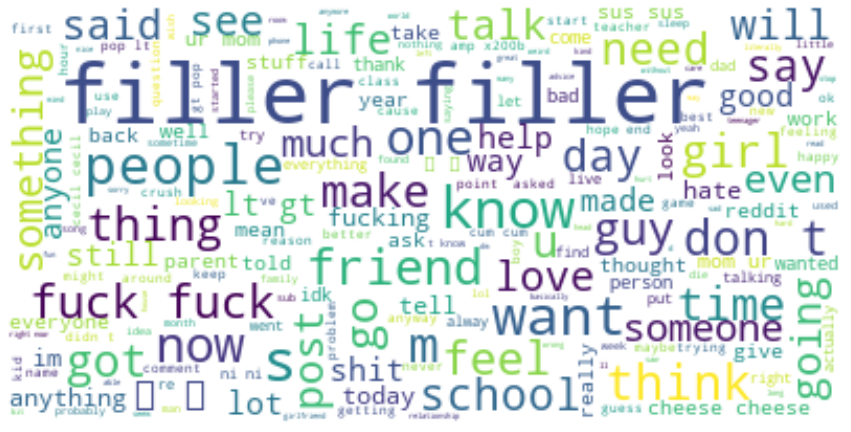

In [105]:
plt.figure(figsize=(15,10))
plt.imshow( wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [107]:
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words
new_stopwords_ns=["filler", " ", "S", "t", "s", "m"]
comb_stopwords_ns=list(new_stopwords_ns)+list(all_stopwords)
wordcloud = WordCloud(stopwords=comb_stopwords_ns, background_color="white").generate(text)
print(new_stopwords_ns)

['filler', ' ', 'S', 't', 's', 'm']


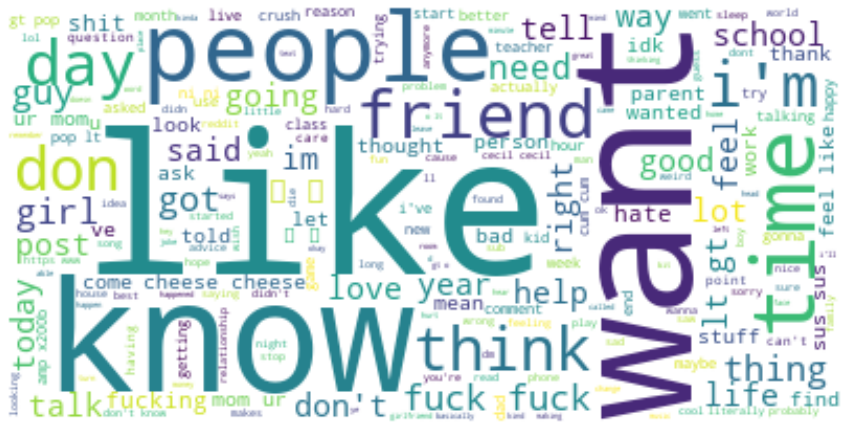

In [108]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [109]:
txt_ns = " ".join(ns['text'])
words_ns = word_tokenize(txt_ns)

In [110]:
def cleaned_words(new_tokens):
	new_tokens = [t.lower() for t in new_tokens]
	new_tokens =[t for t in new_tokens if t not in stopwords.words('english') and comb_stopwords_ns]
	new_tokens = [t for t in new_tokens if t.isalpha()]
	lemmatizer = WordNetLemmatizer()
	new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
	return new_tokens

In [111]:
lowered_ns = cleaned_words(words_ns)

KeyboardInterrupt: 

In [ ]:
bow_ns = Counter(lowered_ns)

In [ ]:
data_ns = pd.DataFrame(bow_ns.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
data_ns = data_ns.head(20)
sns.barplot(x='frequency',y='word',data=data_ns)

#### **What are the most occurring words under the suicide class?**

In [ ]:
text_s = " ".join(i for i in s.text).lower()
wordcloud_s = WordCloud(background_color="white").generate(text_s)

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow( wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
new_stopwords_s=["filler", " ", "S", "t", "s", "m"]
comb_stopwords_s=list(new_stopwords_s)+list(all_stopwords)
wordcloud_s = WordCloud(stopwords=comb_stopwords_s, background_color="white").generate(text)
print(new_stopwords_s)

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_s, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
txt_s = " ".join(s['text'])
words_s = word_tokenize(txt_s)

In [ ]:
def cleaned_words_s(new_tokens_s):
	new_tokens_s = [t.lower() for t in new_tokens_s]
	new_tokens_s =[t for t in new_tokens_s if t not in stopwords.words('english') and comb_stopwords_s]
	new_tokens_s = [t for t in new_tokens_s if t.isalpha()]
	lemmatizer = WordNetLemmatizer()
	new_tokens_s = [lemmatizer.lemmatize(t) for t in new_tokens_s]
	return new_tokens_s

In [ ]:
lowered_s = cleaned_words_s(words_s)

In [ ]:
bow_s = Counter(lowered_s)

In [ ]:
data_s = pd.DataFrame(bow_s.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
data_s = data_s.head(20)
sns.barplot(x='frequency',y='word',data=data_s)

## **Modeling and Evaluation**

### **Modeling**

#### **Model Training**

#### **Hyperparameter Tuning**

### **Evaluation**

#### **Feature Importance**

## **Conclusion**

## **Try out our model!**

## References